In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/5955.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/422.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/970.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/6179.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/100.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1876.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1041.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/4542.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/6052.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/4248.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/3191.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/63.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1364.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1740.npy
/kaggle/input/imp-train/train_data/Comp

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the dataset folders
data_path = '/kaggle/input/imp-train/train_data'
folders = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures', 'Video_detected_Seizures_with_no_visual_change_over_EEG']


In [33]:
def load_eeg_data(folder):
    # Create the full folder path
    folder_path = os.path.join(data_path, folder)
    print(f"Checking folder path: {folder_path}")
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return None
    
    # List all files in the folder
    files = os.listdir(folder_path)
    print(f"Files in {folder}: {files}")
    
    # Check if the folder is empty
    if not files:
        print(f"Folder {folder_path} is empty.")
        return None

    # Get the first file and check if it's a .npy file
    file_path = os.path.join(folder_path, files[0])
    if not file_path.endswith('.npy'):
        print(f"Skipping {file_path} as it is not a .npy file.")
        return None

    # Attempt to load the .npy file
    print(f"Loading data from: {file_path}")
    try:
        data = np.load(file_path)
        print(f"Loaded data shape: {data.shape}")
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Iterate through the folders and load one file from each
for folder in folders:
    print(f"Processing folder: {folder}")
    data = load_eeg_data(folder)
    if data is not None:
        print(data)  # Print the data (or process it further)
    else:
        print(f"No data loaded from folder: {folder}")

Processing folder: Normal
Checking folder path: /kaggle/input/imp-train/train_data/Normal
Files in Normal: ['4548.npy', '5788.npy', '3709.npy', '6104.npy', '4684.npy', '2765.npy', '5197.npy', '5590.npy', '5669.npy', '331.npy', '4299.npy', '2434.npy', '4769.npy', '6082.npy', '4960.npy', '2424.npy', '4621.npy', '4706.npy', '6862.npy', '1200.npy', '3155.npy', '3844.npy', '719.npy', '4791.npy', '6773.npy', '5575.npy', '6254.npy', '4792.npy', '1191.npy', '461.npy', '4155.npy', '5980.npy', '3006.npy', '2083.npy', '1778.npy', '1702.npy', '5175.npy', '2528.npy', '4093.npy', '3996.npy', '2803.npy', '4136.npy', '6222.npy', '3992.npy', '2980.npy', '6365.npy', '5952.npy', '1965.npy', '6002.npy', '4705.npy', '464.npy', '2942.npy', '1479.npy', '4780.npy', '6699.npy', '4184.npy', '122.npy', '2785.npy', '3914.npy', '4495.npy', '1175.npy', '6549.npy', '407.npy', '2114.npy', '3799.npy', '5614.npy', '4186.npy', '5167.npy', '3302.npy', '6001.npy', '2704.npy', '2160.npy', '3854.npy', '2013.npy', '2960.npy'

In [34]:
def calculate_metrics(data):
    """Calculate basic statistical metrics for each channel in EEG data."""
    mean = np.mean(data, axis=1)
    zero_crossings = np.sum(np.diff(np.sign(data), axis=1) != 0, axis=1)
    value_range = np.ptp(data, axis=1)
    energy = np.sum(data**2, axis=1)
    rms = np.sqrt(np.mean(data**2, axis=1))
    variance = np.var(data, axis=1)
    
    metrics_df = pd.DataFrame({
        'Mean': mean,
        'Zero Crossing Rate': zero_crossings,
        'Range': value_range,
        'Energy': energy,
        'RMS': rms,
        'Variance': variance
    }, index=[f'Channel {i+1}' for i in range(data.shape[0])])
    
    return metrics_df
    
#metrics for each file
all_metrics = []
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path, files[0])
    if file_path.endswith('.npy'):
        data = np.load(file_path)
        print(f"Processing: {file_path}, Shape: {data.shape}")
        metrics_df = calculate_metrics(data)
        metrics_df['Class'] = folder
        all_metrics.append(metrics_df)

# Combine results and save to CSV
final_metrics_df = pd.concat(all_metrics)
final_metrics_df.to_csv('/kaggle/working/eeg_metrics.csv', index=True)
print("Metrics saved to eeg_metrics.csv")
print(final_metrics_df)

Processing: /kaggle/input/imp-train/train_data/Normal/4548.npy, Shape: (19, 500)
Processing: /kaggle/input/imp-train/train_data/Complex_Partial_Seizures/5955.npy, Shape: (19, 500)
Processing: /kaggle/input/imp-train/train_data/Electrographic_Seizures/7009.npy, Shape: (19, 500)
Processing: /kaggle/input/imp-train/train_data/Video_detected_Seizures_with_no_visual_change_over_EEG/789.npy, Shape: (19, 500)
Metrics saved to eeg_metrics.csv
                Mean  Zero Crossing Rate     Range    Energy       RMS  \
Channel 1  -0.000347                  19  0.069153  0.145882  0.017081   
Channel 2  -0.000478                   8  0.038361  0.030282  0.007782   
Channel 3  -0.000337                   5  0.048157  0.056461  0.010626   
Channel 4  -0.002792                   5  0.079285  0.159185  0.017843   
Channel 5  -0.000800                   5  0.023132  0.014930  0.005464   
...              ...                 ...       ...       ...       ...   
Channel 15  0.001336                  15  0

In [35]:
import numpy as np
import pandas as pd

# extracting zero crossings for later usage
def extract_zero_crossings(data, filename='zero_crossings.csv'):
    """
    Extract the zero-crossing rate for each channel in the EEG data and save it to a CSV file.
    
    Parameters:
        data (numpy.ndarray): EEG data with shape (channels, time_steps).
        filename (str): The name of the CSV file to save the zero-crossing data.
    """
    # Calculate the zero-crossing rate for each channel across time steps (axis=1)
    zero_crossings = np.sum(np.diff(np.sign(data), axis=1) != 0, axis=1)
    
    # Create a DataFrame for the zero-crossings with channel names as the index
    zero_crossing_df = pd.DataFrame({
        'Zero Crossing Rate': zero_crossings
    }, index=[f'Channel {i+1}' for i in range(data.shape[0])])
    
    # Save the DataFrame to a CSV file
    zero_crossing_df.to_csv(filename)


extract_zero_crossings(data, 'zero_crossings.csv')
print("Zero crossings saved to 'zero_crossings.csv'.")


Zero crossings saved to 'zero_crossings.csv'.


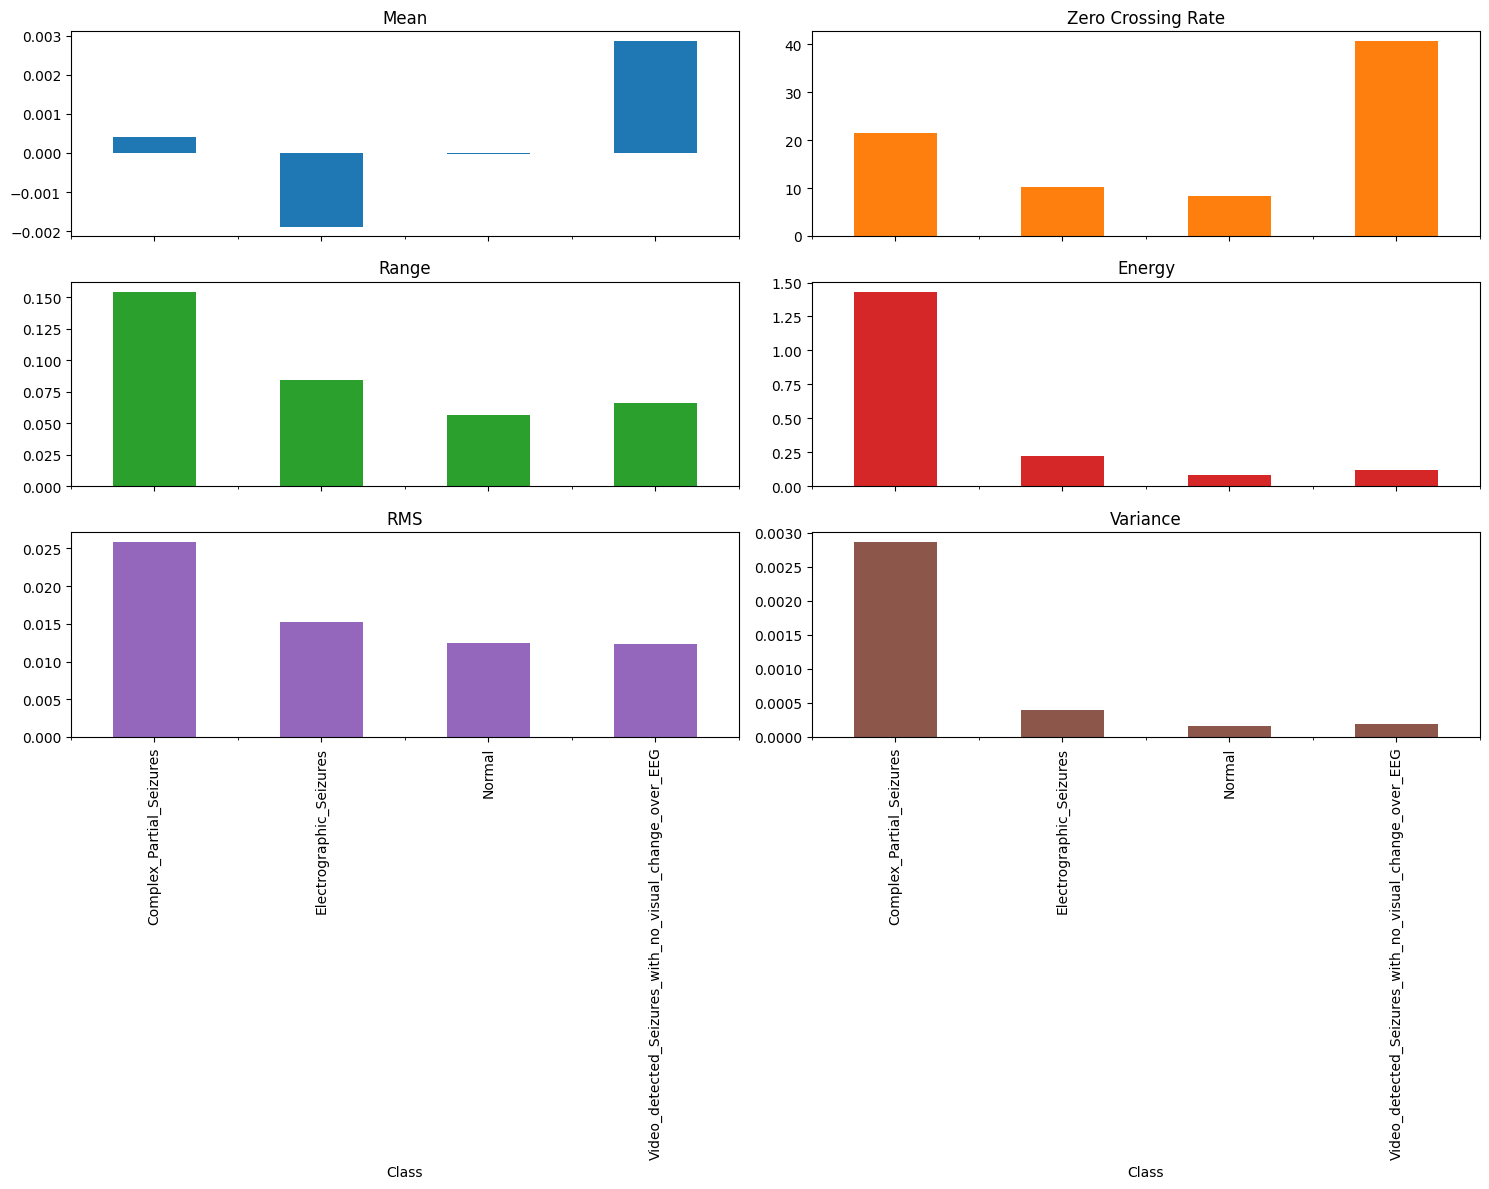

In [36]:
# Generate simulated EEG data

# Calculate metrics for all datasets
all_metrics_df = pd.concat(all_metrics)

# Ensure unique indexing for proper styling
all_metrics_df.reset_index(drop=True, inplace=True)

# Display as a styled table with the updated format method
styled_table = all_metrics_df.style.background_gradient(cmap='coolwarm').format(precision=3)
display(styled_table)


# Plot metrics as bar charts for the average of each metric across all datasets
all_metrics_df.groupby('Class').mean(numeric_only=True).plot(
    kind='bar', subplots=True, layout=(3, 2), figsize=(15, 12), legend=False, sharex=True
)
plt.tight_layout()
plt.show()


Loading data from: /kaggle/input/imp-train/train_data/Normal/4548.npy
Data shape: (19, 500)


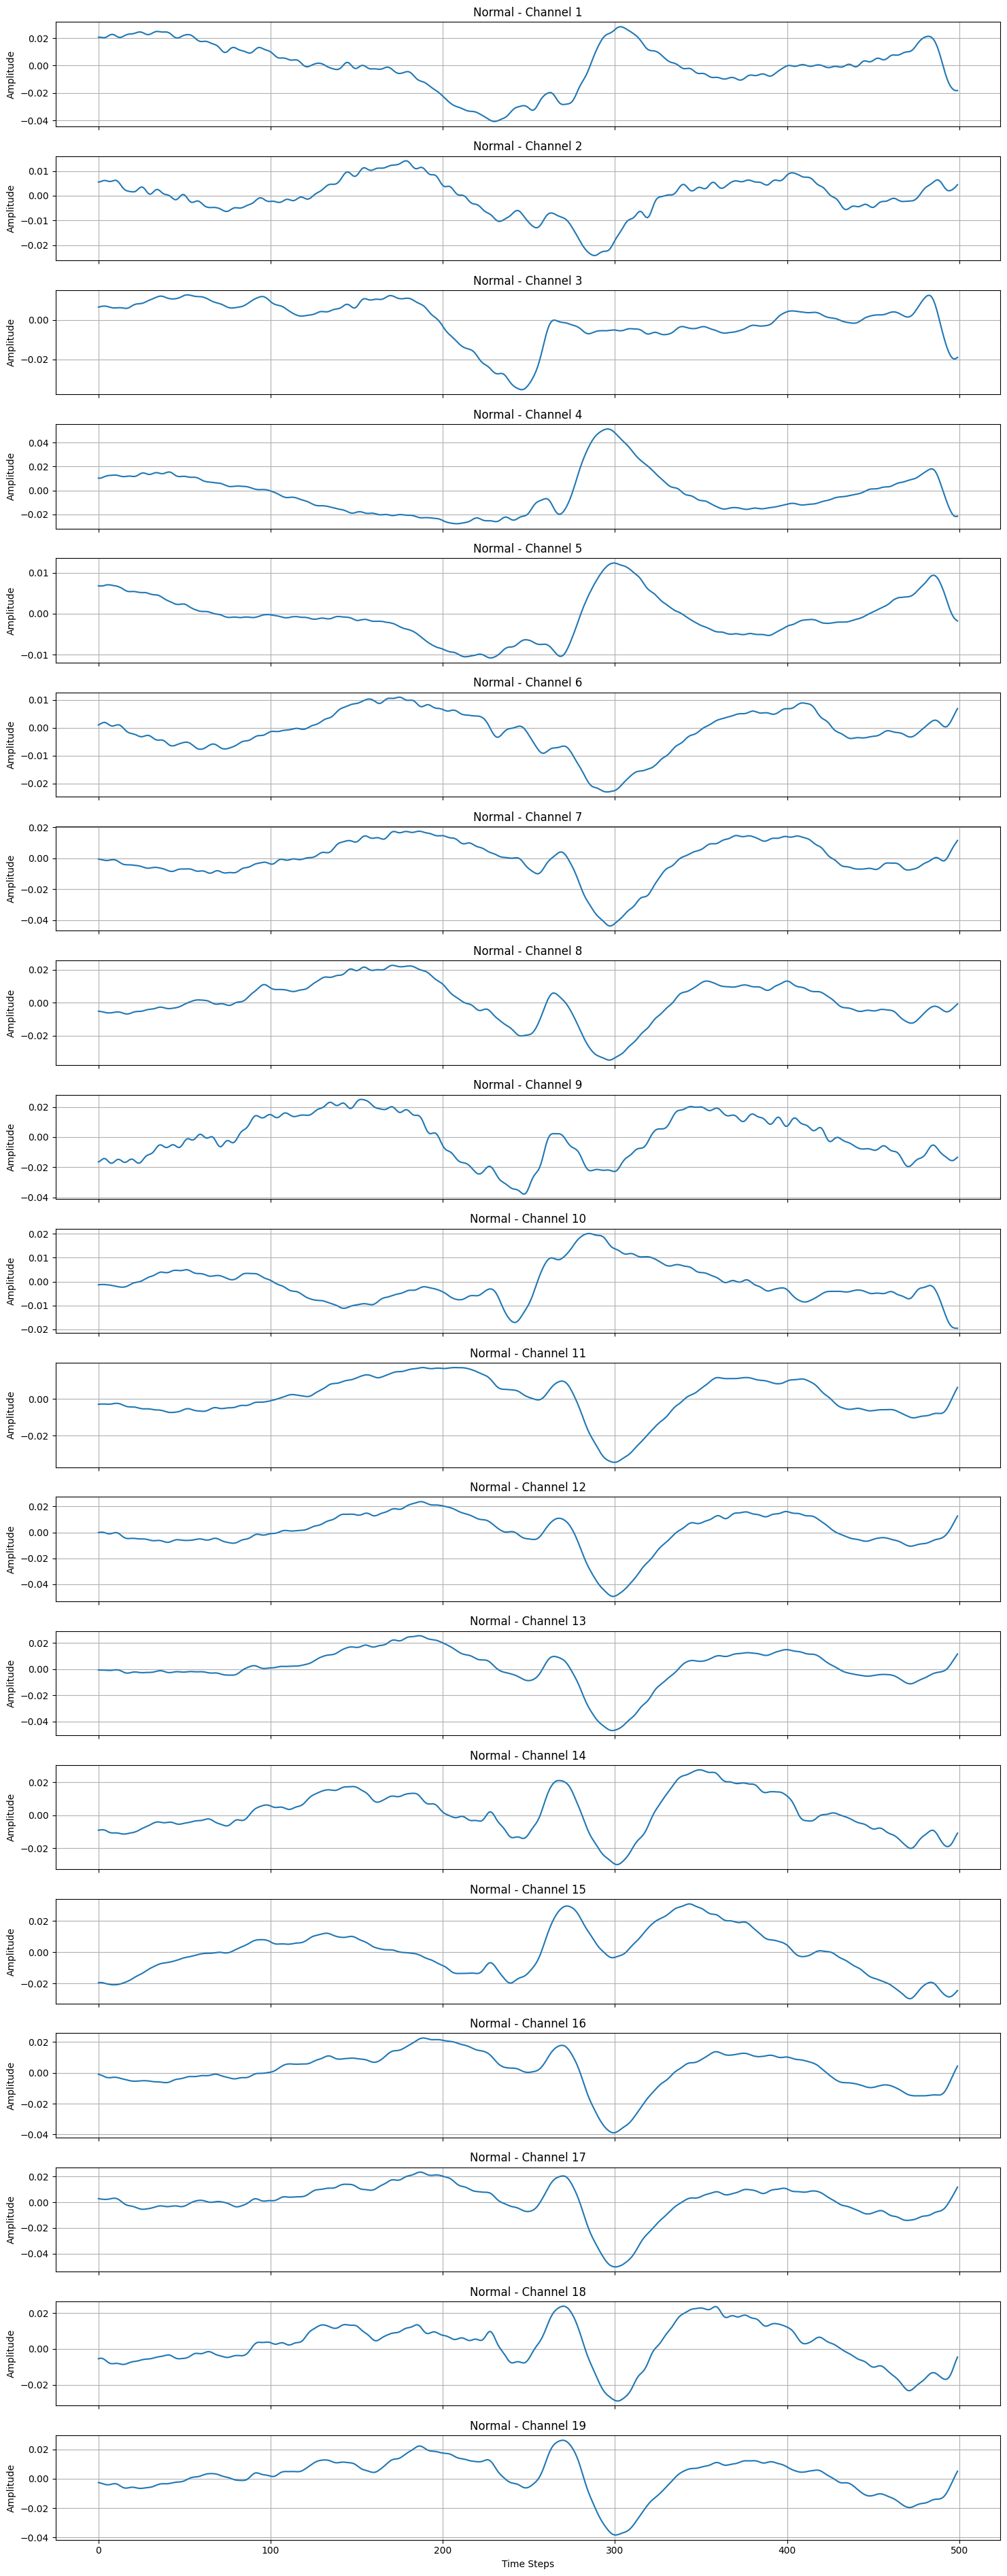

Loading data from: /kaggle/input/imp-train/train_data/Complex_Partial_Seizures/5955.npy
Data shape: (19, 500)


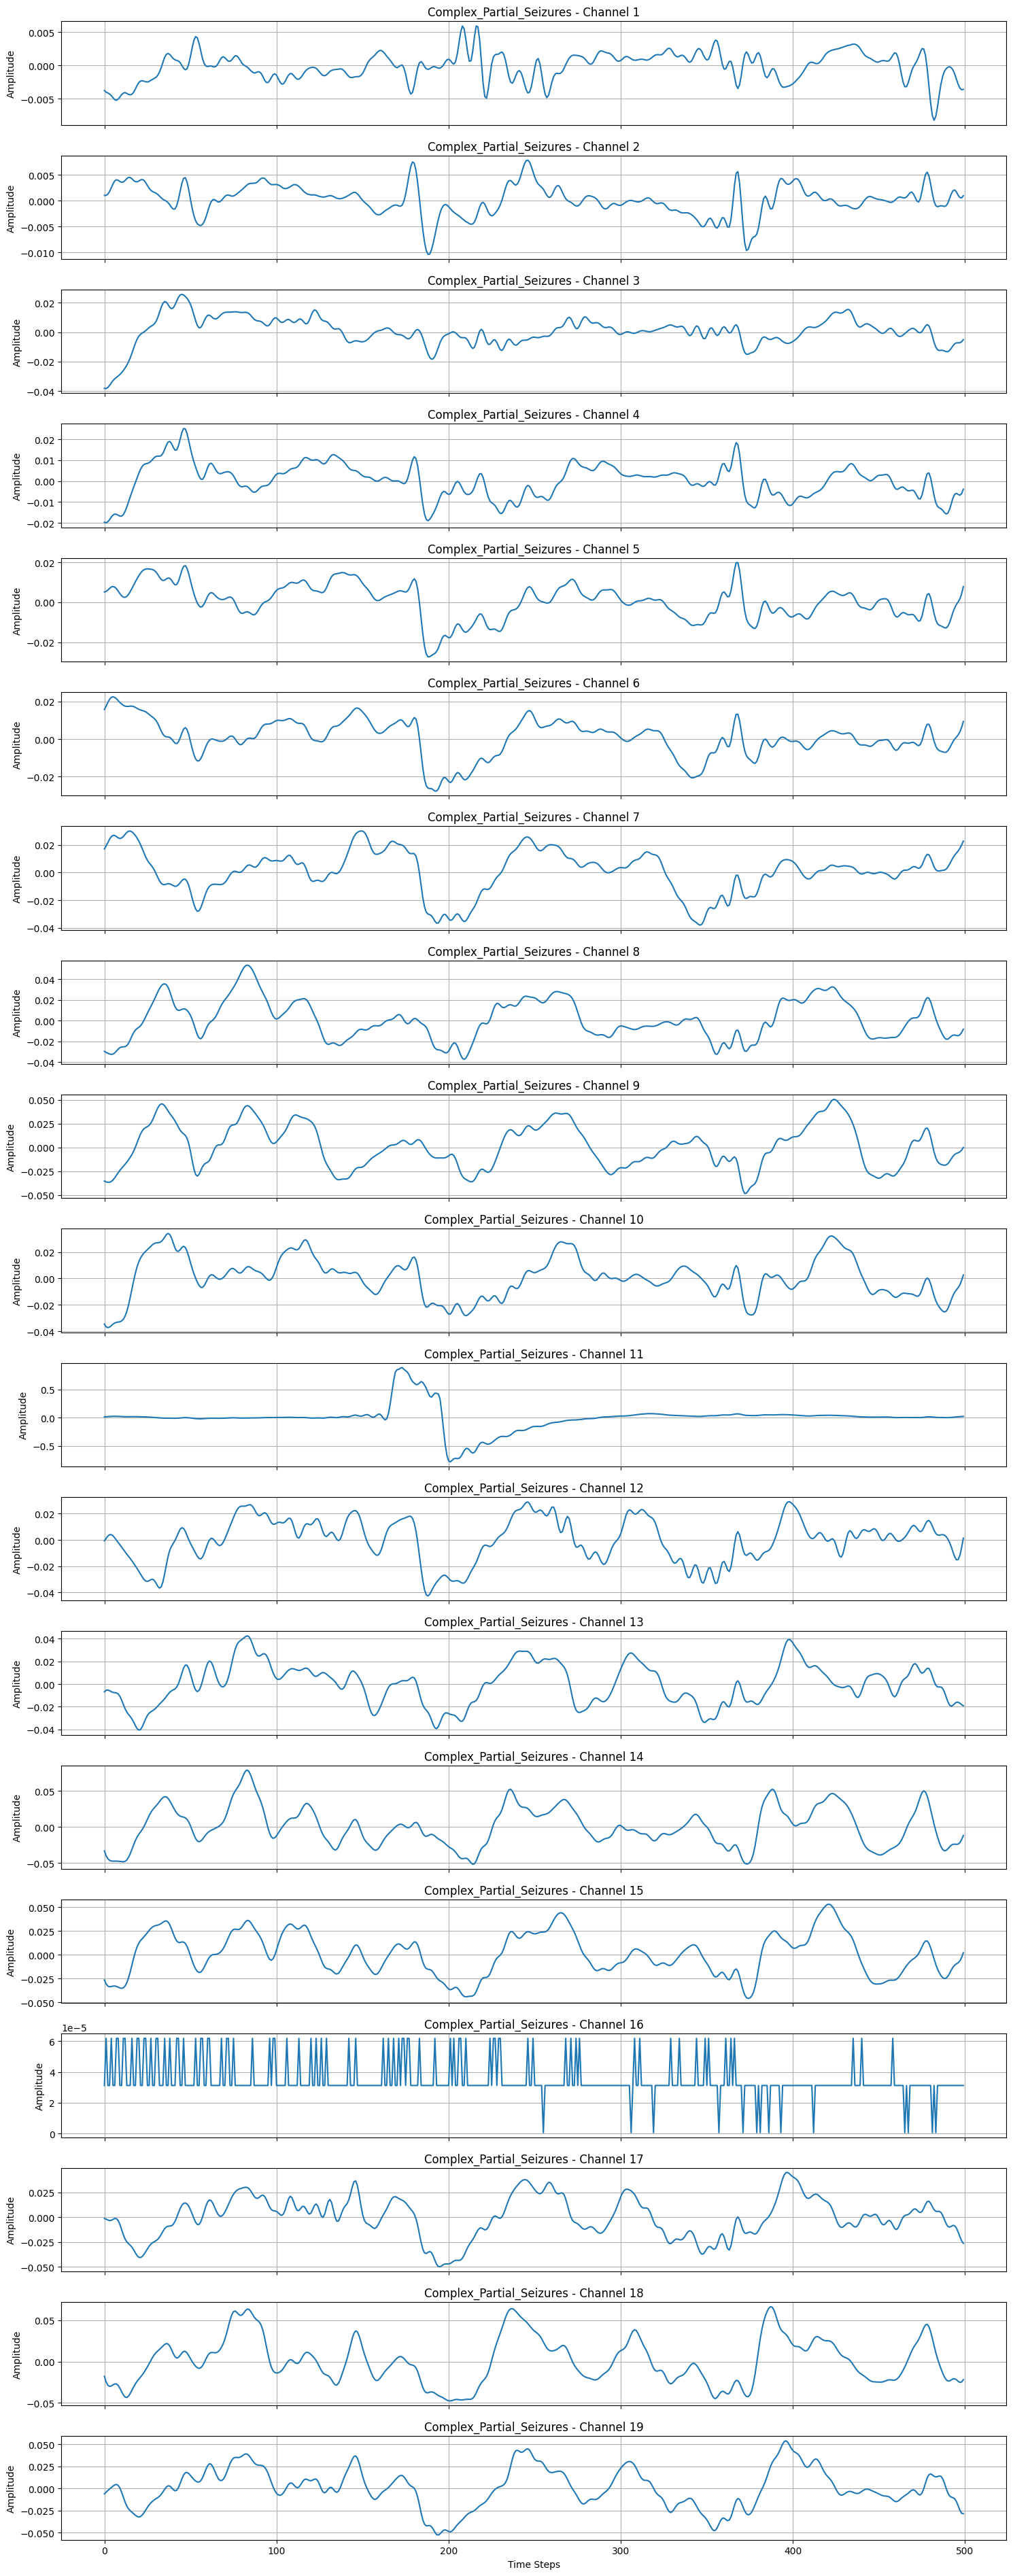

Loading data from: /kaggle/input/imp-train/train_data/Electrographic_Seizures/7009.npy
Data shape: (19, 500)


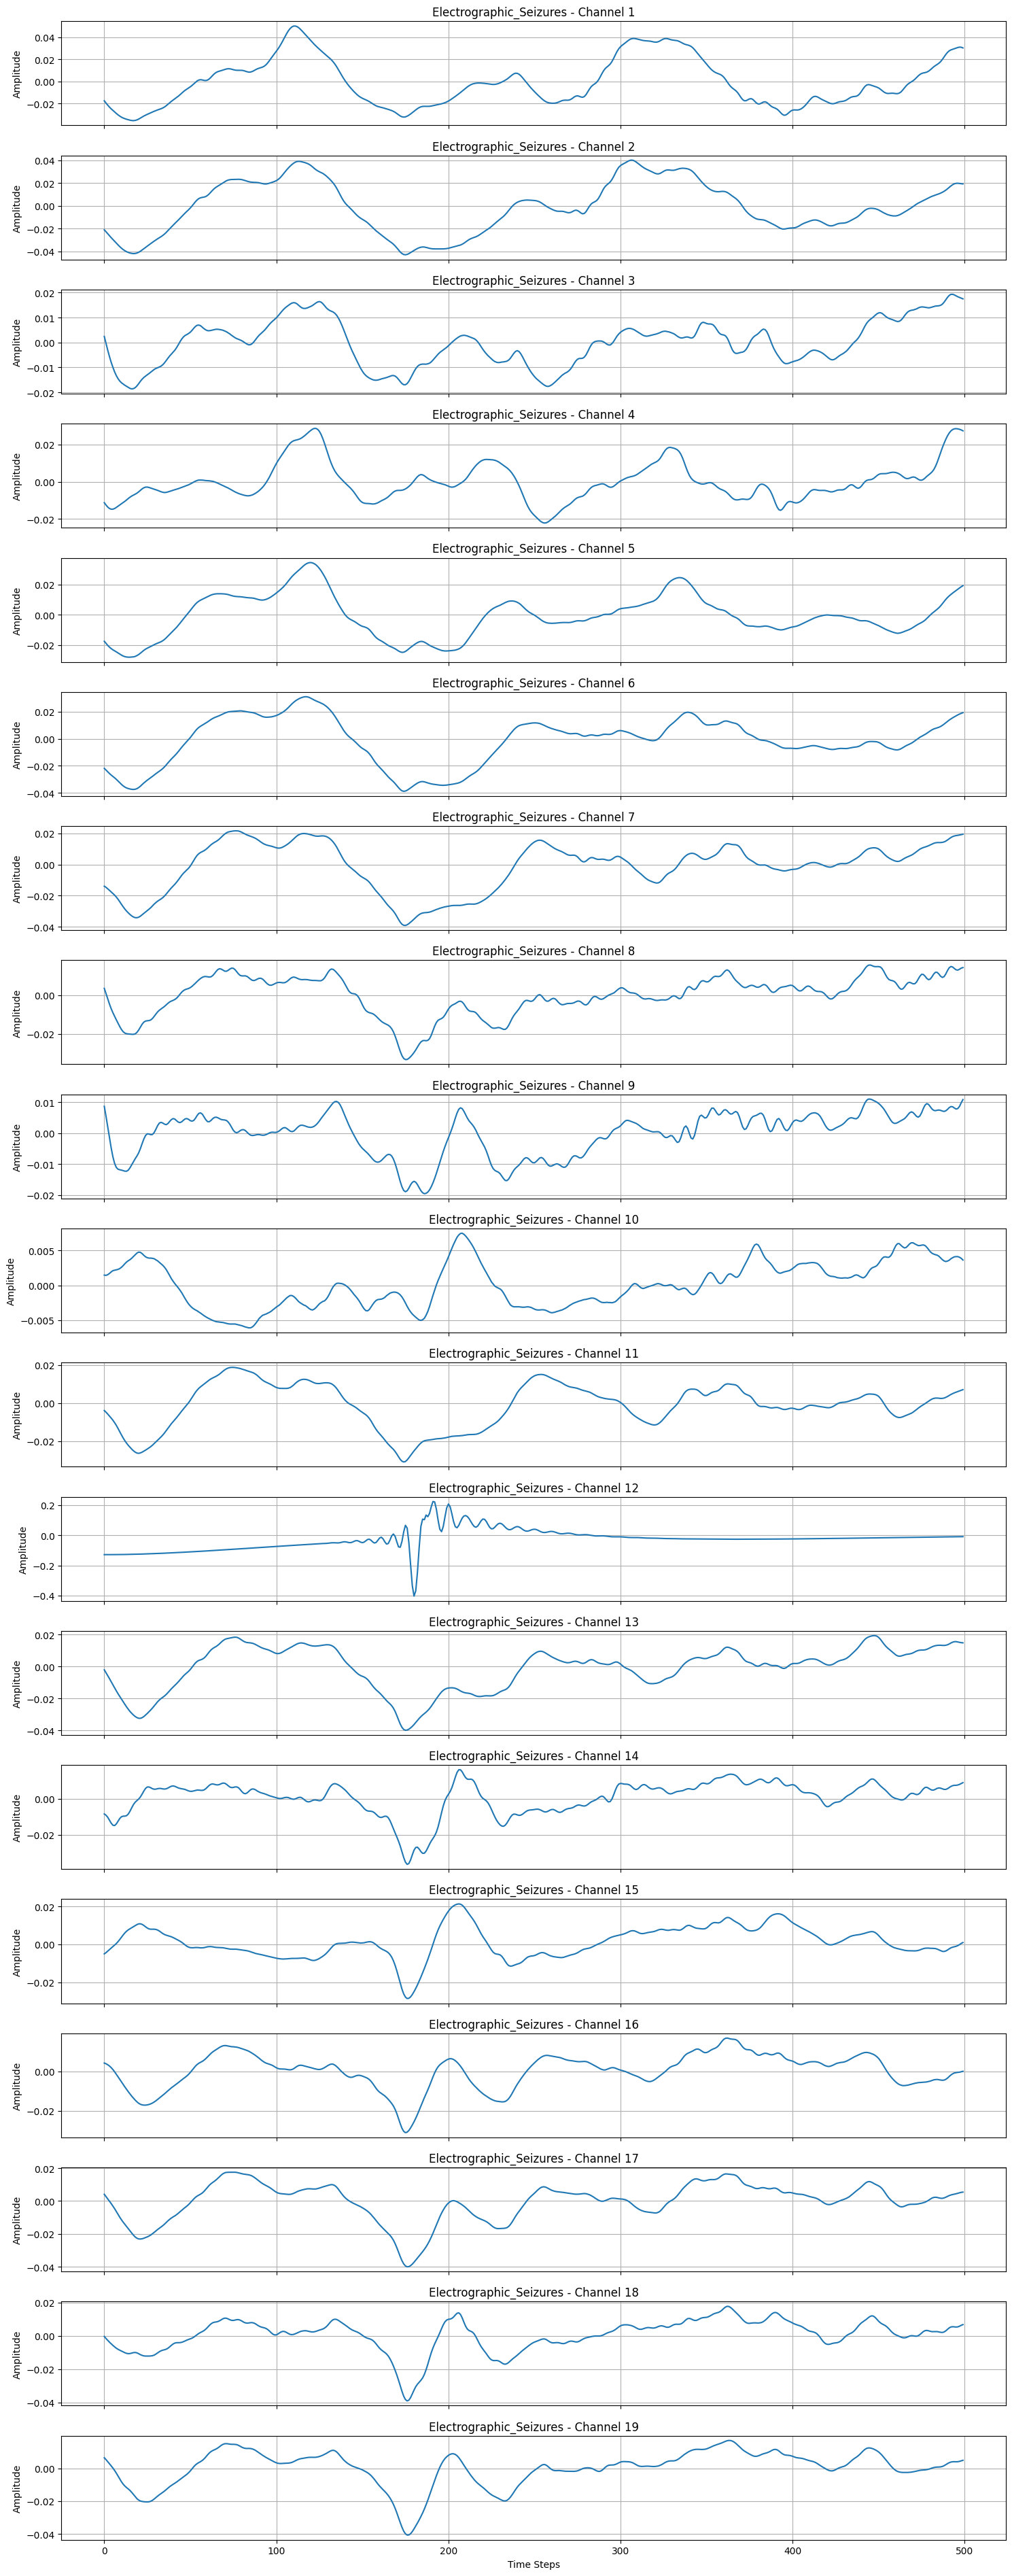

Loading data from: /kaggle/input/imp-train/train_data/Video_detected_Seizures_with_no_visual_change_over_EEG/789.npy
Data shape: (19, 500)


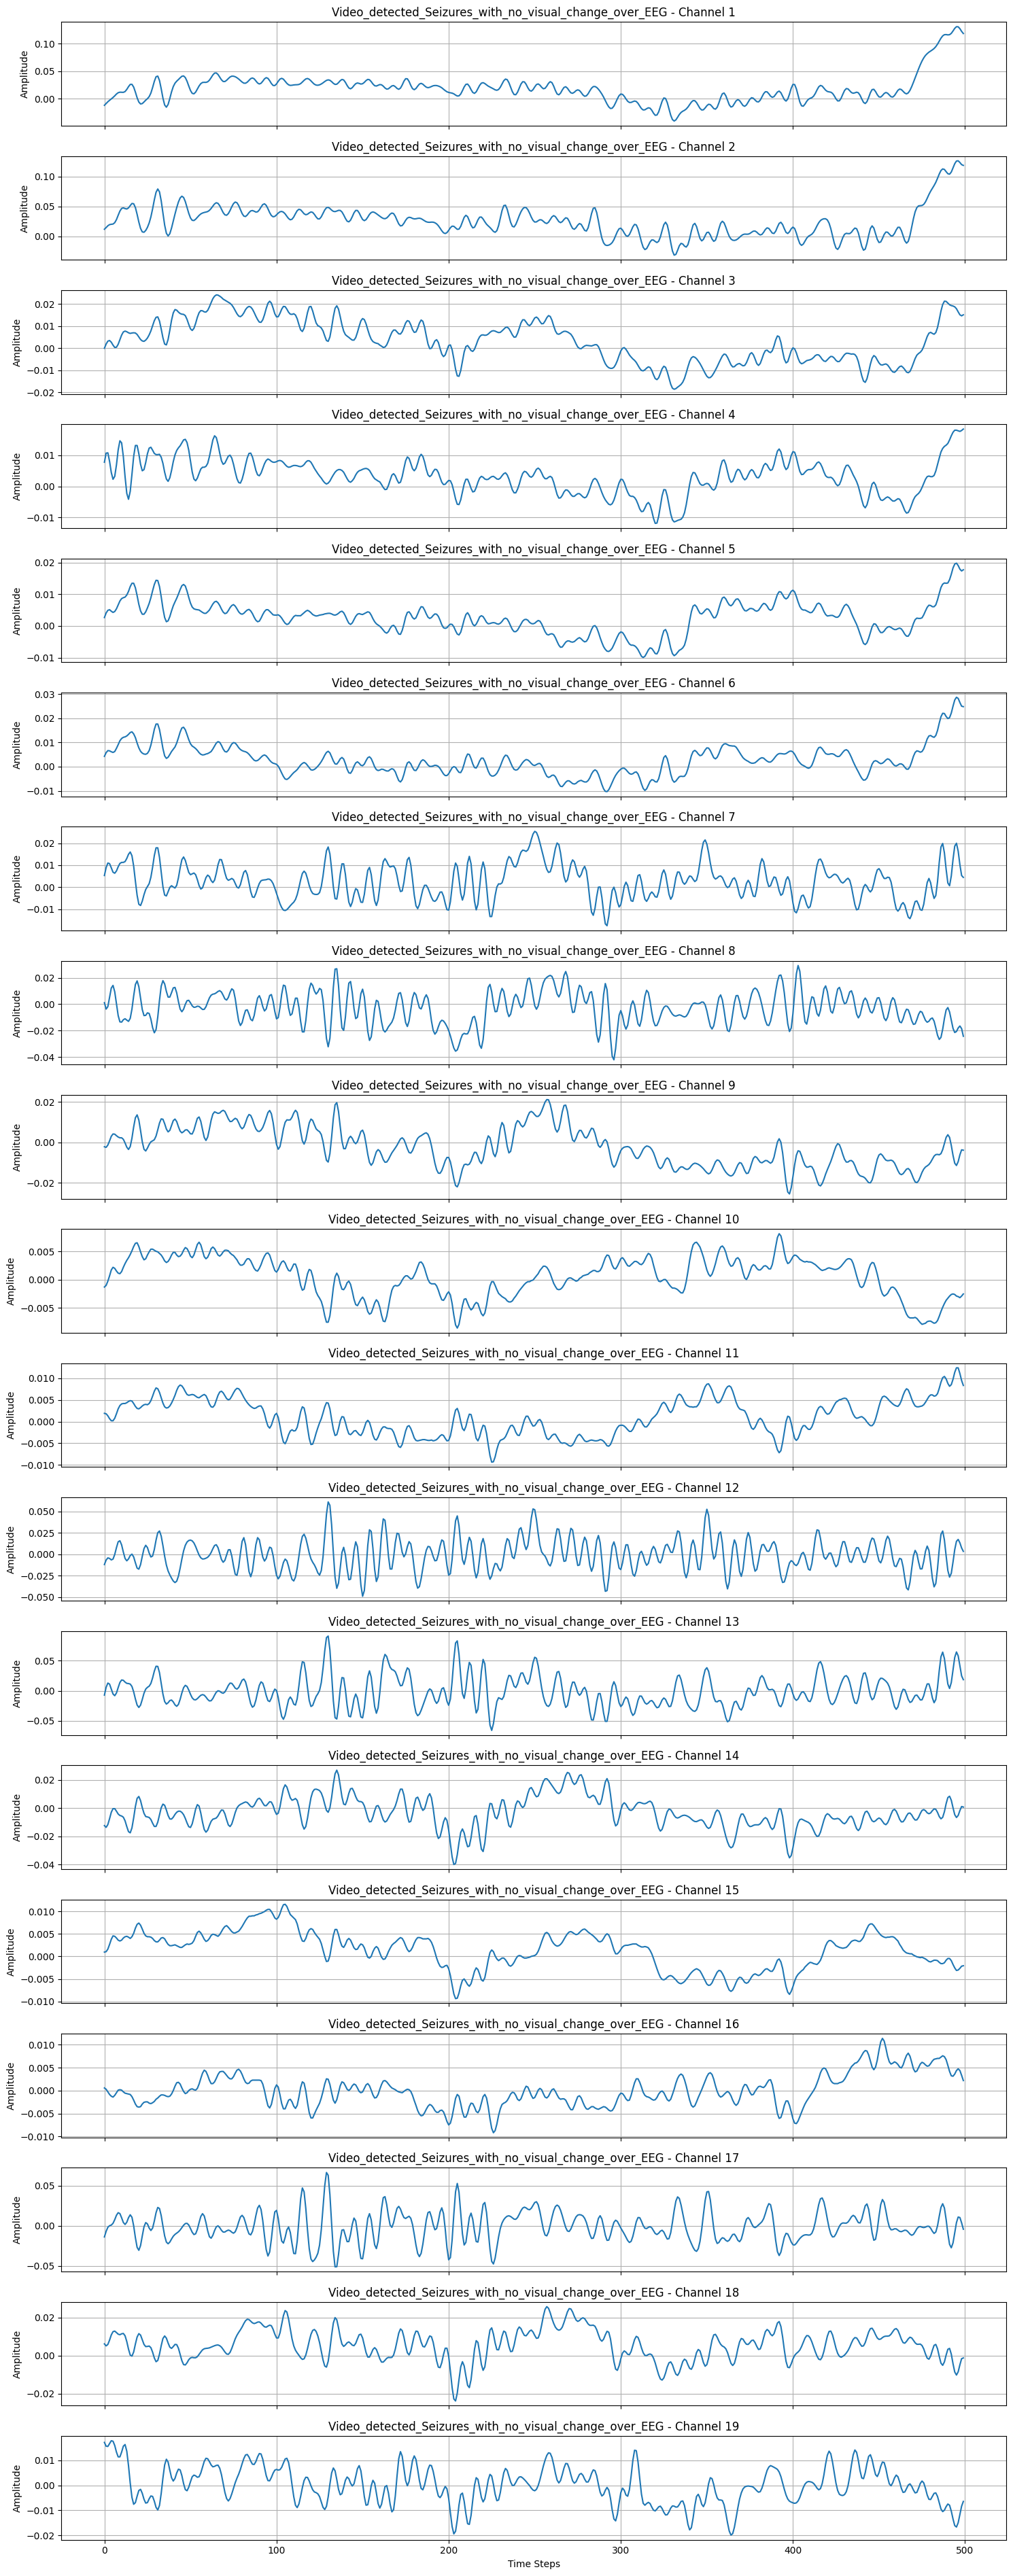

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base path to the dataset
data_path = '/kaggle/input/imp-train/train_data'

def plot_each_channel_separately(data, folder_name):
    """
    Plot each EEG channel in separate subplots.
    
    Parameters:
    - data: 2D numpy array with shape (19, N), where N is the number of time points.
    - folder_name: Name of the folder (used in titles).
    """
    num_channels = data.shape[0]
    fig, axes = plt.subplots(num_channels, 1, figsize=(15, 2 * num_channels), sharex=True)

    for i in range(num_channels):
        axes[i].plot(data[i, :])
        axes[i].set_title(f'{folder_name} - Channel {i+1}')
        axes[i].set_ylabel('Amplitude')
        axes[i].grid(True)
    
    plt.xlabel('Time Steps')
    plt.tight_layout()
    plt.show()

# Iterate over folders and process the first file in each
folders = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures', 'Video_detected_Seizures_with_no_visual_change_over_EEG']

for folder in folders:
    folder_path = os.path.join(data_path, folder)
    
    try:
        files = os.listdir(folder_path)  # List files in the folder
        if files:  # Ensure the folder is not empty
            first_file_path = os.path.join(folder_path, files[0])
            if first_file_path.endswith('.npy'):  # Check for .npy files
                print(f"Loading data from: {first_file_path}")
                data = np.load(first_file_path)
                
                # Check if data has the expected shape
                if data is not None and len(data.shape) == 2:
                    print(f"Data shape: {data.shape}")
                    plot_each_channel_separately(data, folder)
                else:
                    print(f"Data shape is invalid or unexpected: {data.shape}")
            else:
                print(f"First file in {folder} is not an .npy file: {first_file_path}")
        else:
            print(f"No files found in folder: {folder}")
    except NotADirectoryError:
        print(f"Not a directory: {folder_path}")
    except Exception as e:
        print(f"Error processing folder {folder}: {e}")


Loading data from: /kaggle/input/imp-train/train_data/Normal/4548.npy
Data shape: (19, 500)


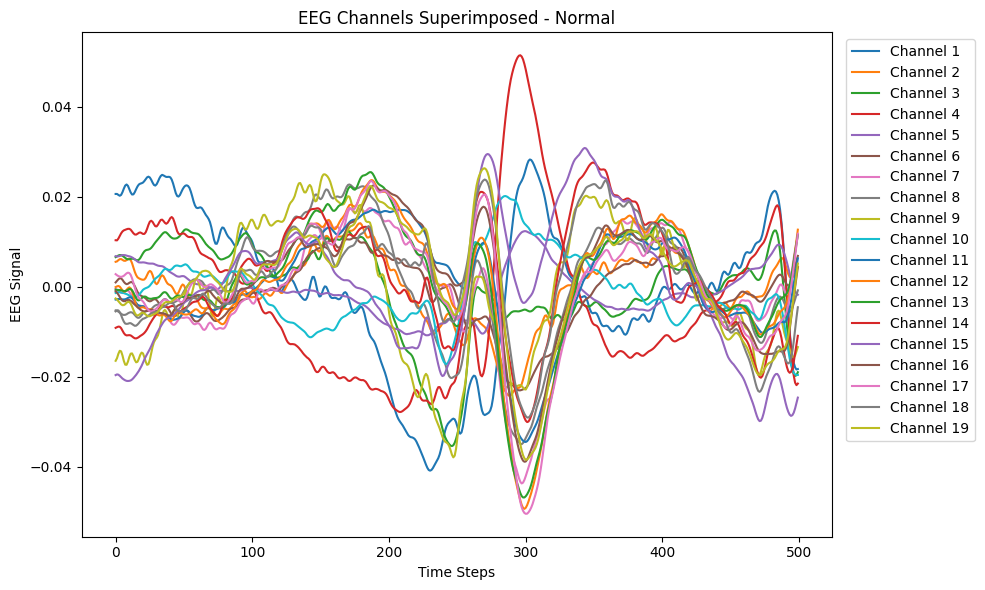

Loading data from: /kaggle/input/imp-train/train_data/Complex_Partial_Seizures/5955.npy
Data shape: (19, 500)


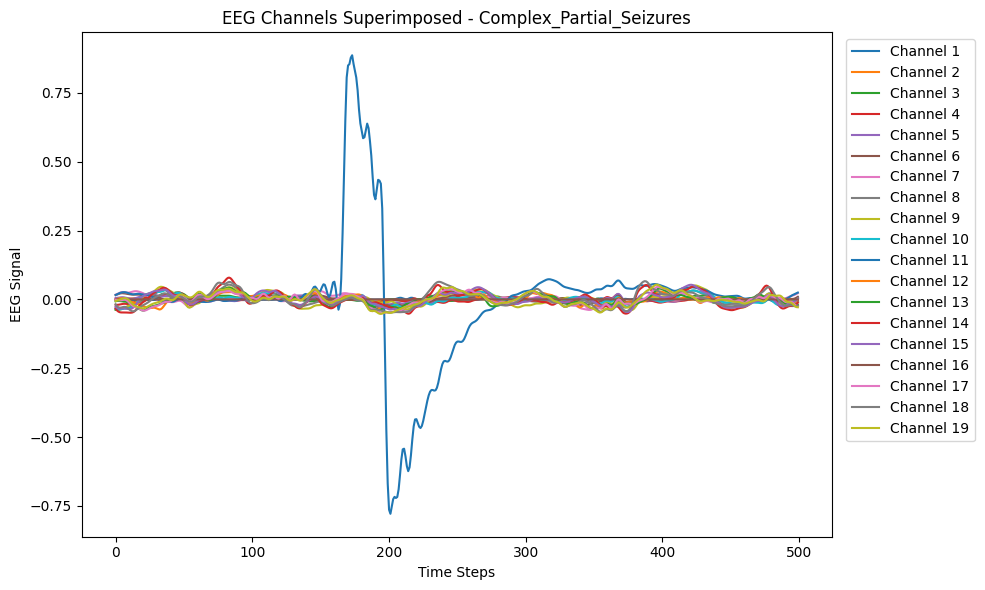

Loading data from: /kaggle/input/imp-train/train_data/Electrographic_Seizures/7009.npy
Data shape: (19, 500)


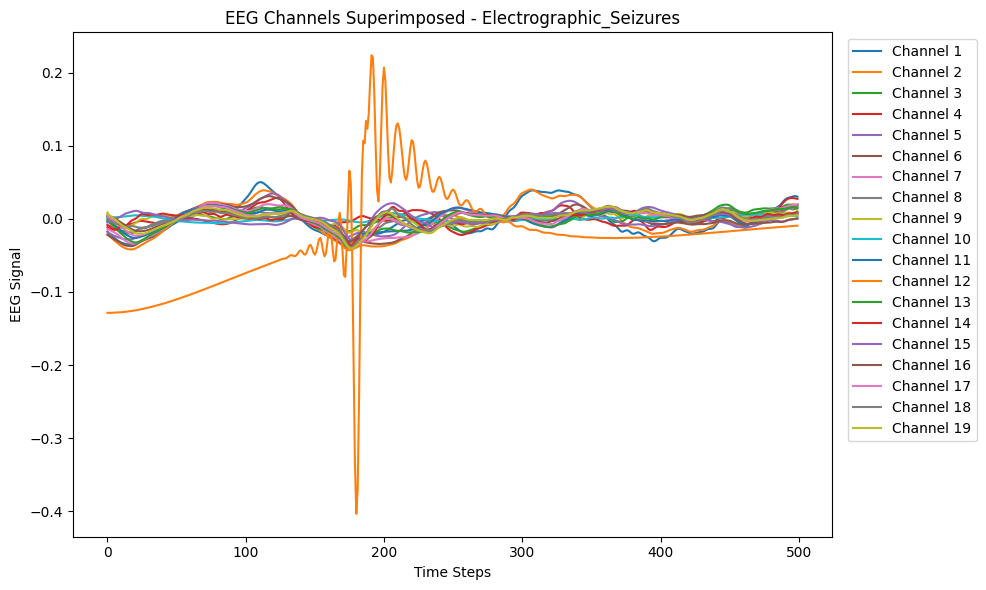

Loading data from: /kaggle/input/imp-train/train_data/Video_detected_Seizures_with_no_visual_change_over_EEG/789.npy
Data shape: (19, 500)


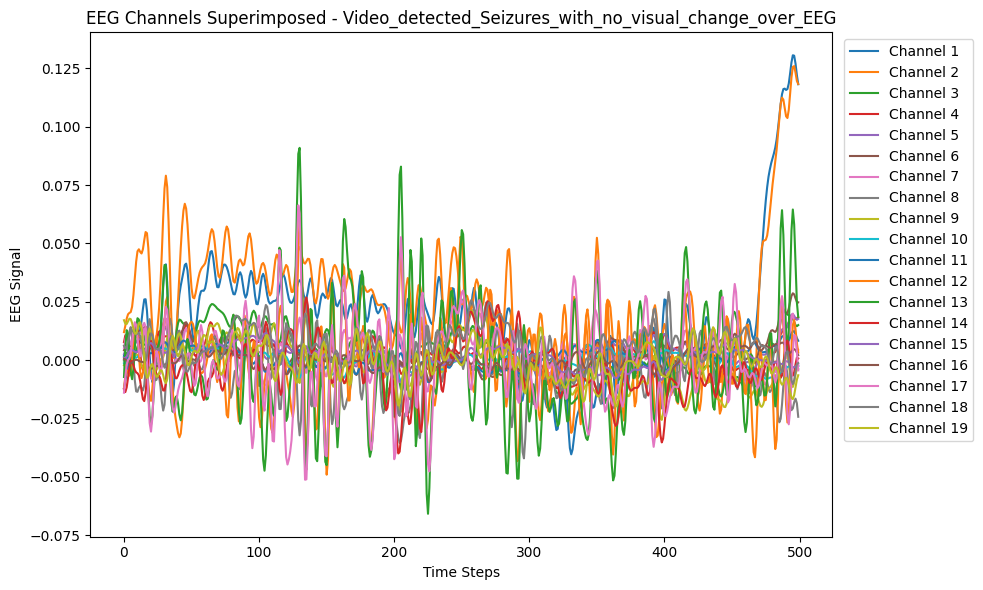

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base path to the dataset
data_path = '/kaggle/input/imp-train/train_data'

def plot_all_channels_superimposed(data, title="All Channels Superimposed"):
    """
    Plot all EEG channels superimposed on a single plot.
    
    Parameters:
    - data: 2D numpy array with shape (19, N), where N is the number of time points.
    - title: Title of the plot (default is "All Channels Superimposed").
    """
    plt.figure(figsize=(10, 6))
    
    # Plot each channel in the same plot
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'Channel {i+1}')
    
    plt.xlabel('Time Steps')
    plt.ylabel('EEG Signal')
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()

# Iterate over folders and plot the data
folders = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures', 'Video_detected_Seizures_with_no_visual_change_over_EEG']

for folder in folders:
    folder_path = os.path.join(data_path, folder)
    
    try:
        files = os.listdir(folder_path)  # List files in the folder
        if files:  # Ensure the folder is not empty
            first_file_path = os.path.join(folder_path, files[0])
            if first_file_path.endswith('.npy'):  # Check for .npy files
                print(f"Loading data from: {first_file_path}")
                data = np.load(first_file_path)
                
                # Check if data has the expected shape
                if data is not None and len(data.shape) == 2:
                    print(f"Data shape: {data.shape}")
                    plot_all_channels_superimposed(data, f"EEG Channels Superimposed - {folder}")
                else:
                    print(f"Data shape is invalid or unexpected: {data.shape}")
            else:
                print(f"First file in {folder} is not an .npy file: {first_file_path}")
        else:
            print(f"No files found in folder: {folder}")
    except NotADirectoryError:
        print(f"Not a directory: {folder_path}")
    except Exception as e:
        print(f"Error processing folder {folder}: {e}")
